#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

**Data Description:**          
-Sales : Unit sales (in thousands) at each location                 
-Competitor Price : Price charged by competitor at each location                       
-Income : Community income level (in thousands of dollars)                    
-Advertising : Local advertising budget for company at each location (in thousands of dollars)                 
-Population : Population size in region (in thousands)               
-Price : Price company charges for car seats at each site        
-Shelf Location at stores : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site                
-Age : Average age of the local population               
-Education : Education level at each location                     
-Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location                       
-US : A factor with levels No and Yes to indicate whether the store is in the US or not                          

In [1]:
import pandas as pd
cd = pd.read_csv('/content/Company_Data (1).csv')
cd


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [2]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [3]:

cd.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


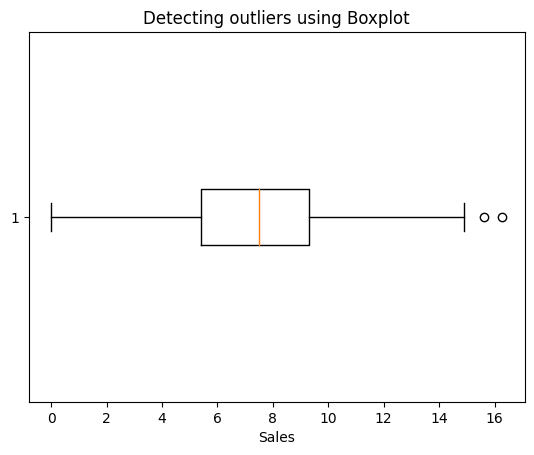

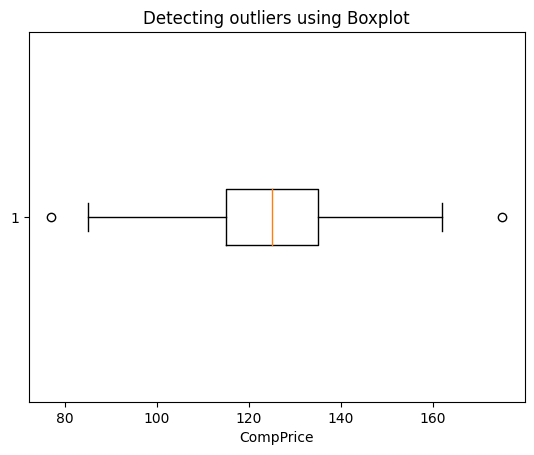

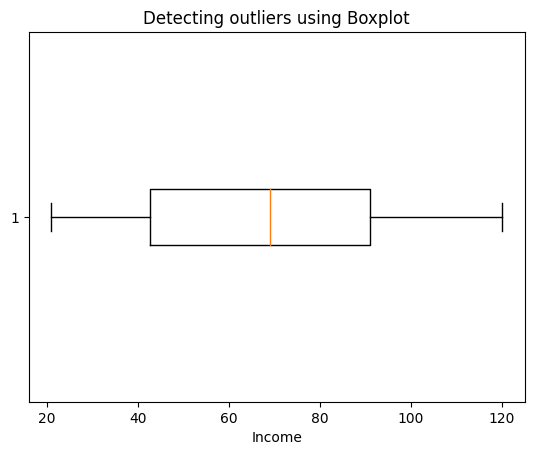

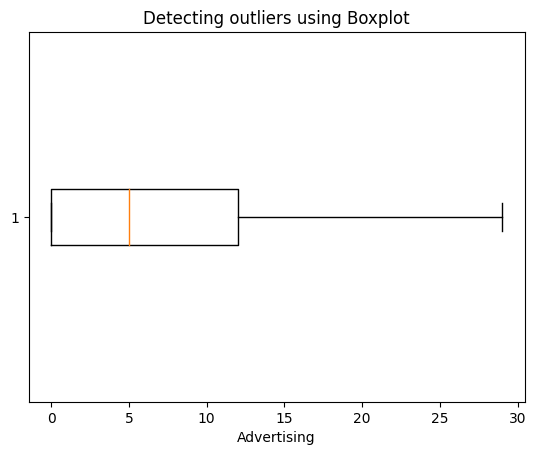

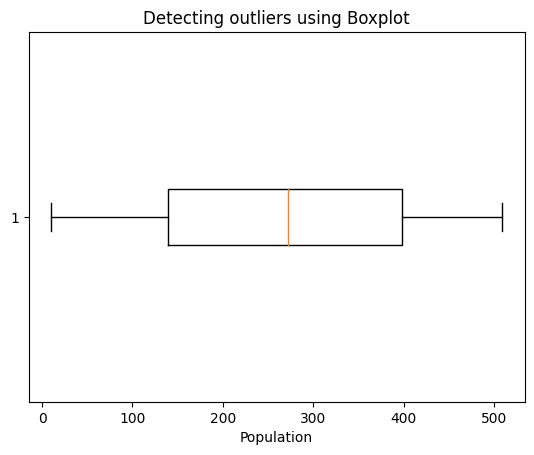

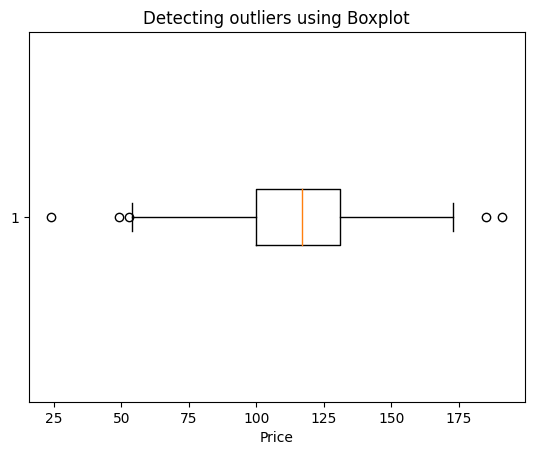

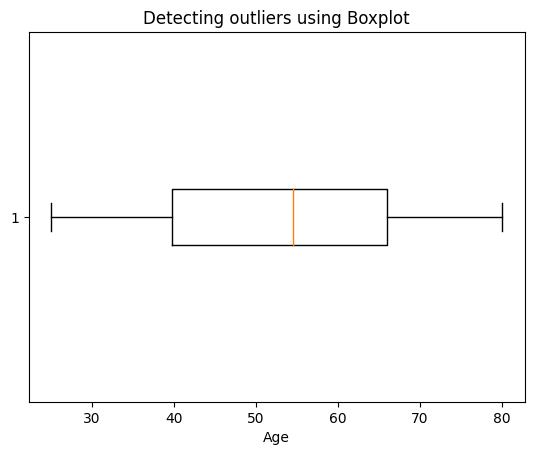

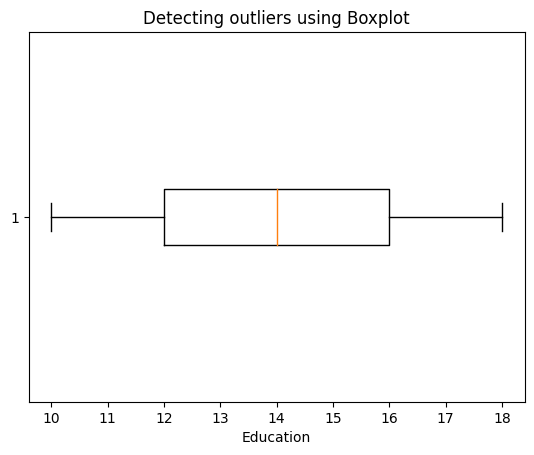

In [5]:
import matplotlib.pyplot as plt
for i in dict(cd.dtypes):
 if dict(cd.dtypes)[i] == 'int64' or dict(cd.dtypes)[i] ==  'float64':
  plt.boxplot(cd[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [6]:
## Using the zscore to find out no.of outliers

In [7]:

import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers

In [8]:
# detecting   and replacing outliers with median

for i in dict(cd.dtypes):
 outliers = []
 if dict(cd.dtypes)[i] == 'int64' or dict(cd.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(cd[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(cd[i])
   for j in sample_outliers:
    cd[i] = np.where(cd[i]==j, median, cd[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(cd[i])
   print("Outliers from Z-scores method: ", sample_outliers)


Column:  Sales
Outliers from Z-scores method:  [16.27]
After treatment: 
Outliers from Z-scores method:  []
Column:  CompPrice
Outliers from Z-scores method:  [77, 175]
After treatment: 
Outliers from Z-scores method:  []
Column:  Income
Outliers from Z-scores method:  []
Column:  Advertising
Outliers from Z-scores method:  [29]
After treatment: 
Outliers from Z-scores method:  []
Column:  Population
Outliers from Z-scores method:  []
Column:  Price
Outliers from Z-scores method:  [24, 191]
After treatment: 
Outliers from Z-scores method:  [185.0]
Column:  Age
Outliers from Z-scores method:  []
Column:  Education
Outliers from Z-scores method:  []


In [9]:

cd.nunique()

Sales          335
CompPrice       71
Income          98
Advertising     27
Population     275
Price           99
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

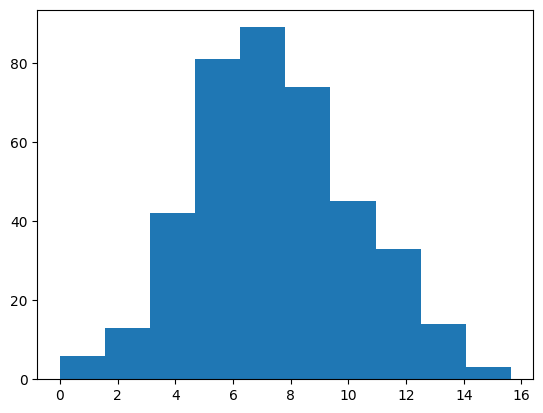

In [10]:
import matplotlib.pyplot as plt
plt.hist('Sales',data=cd)
plt.show()

In [11]:
q1 = cd['Sales'].quantile(0.25)
q2 = cd['Sales'].quantile(0.5)
q3 = cd['Sales'].quantile(0.75)

In [12]:
def categorize_sales(value):
    if value < q1:
        return 'Low'
    elif value < q3:
        return 'Moderate'
    else:
        return 'High'
cd['Sales'] = cd['Sales'].apply(categorize_sales)
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138.0,73,11.0,276,120.0,Bad,42,17,Yes,Yes
1,High,111.0,48,16.0,260,83.0,Good,65,10,Yes,Yes
2,High,113.0,35,10.0,269,80.0,Medium,59,12,Yes,Yes
3,Moderate,117.0,100,4.0,466,97.0,Medium,55,14,Yes,Yes
4,Low,141.0,64,3.0,340,128.0,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138.0,108,17.0,203,128.0,Good,33,14,Yes,Yes
396,Moderate,139.0,23,3.0,37,120.0,Medium,55,11,No,Yes
397,Moderate,162.0,26,12.0,368,159.0,Medium,40,18,Yes,Yes
398,Moderate,100.0,79,7.0,284,95.0,Bad,50,12,Yes,Yes


In [13]:

mappings = {}
for i in dict(cd.dtypes):
 if dict(cd.dtypes)[i] == 'O':
  mappings[i] = dict(zip(cd[i].unique(), range(len(cd[i].unique()))))
  cd[i] = cd[i].map(lambda x: mappings[i][x])
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138.0,73,11.0,276,120.0,0,42,17,0,0
1,0,111.0,48,16.0,260,83.0,1,65,10,0,0
2,0,113.0,35,10.0,269,80.0,2,59,12,0,0
3,1,117.0,100,4.0,466,97.0,2,55,14,0,0
4,2,141.0,64,3.0,340,128.0,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138.0,108,17.0,203,128.0,1,33,14,0,0
396,1,139.0,23,3.0,37,120.0,2,55,11,1,0
397,1,162.0,26,12.0,368,159.0,2,40,18,0,0
398,1,100.0,79,7.0,284,95.0,0,50,12,0,0


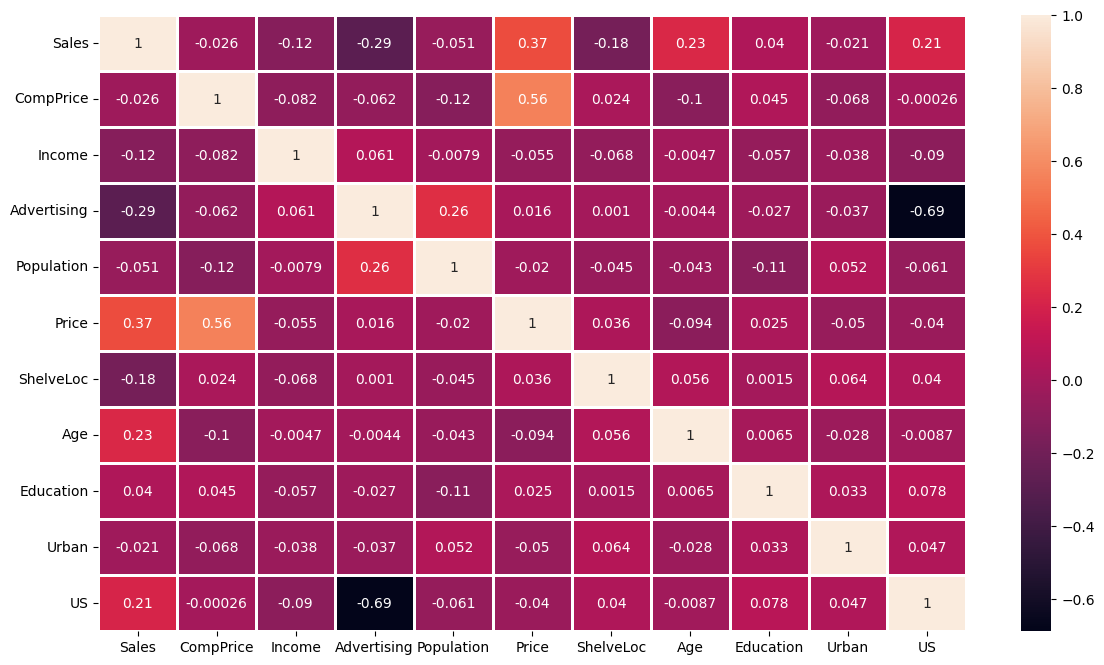

In [14]:
import seaborn as sns
plt.figure(figsize = (14, 8))
corr = cd.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
y = cd['Sales']
x = cd.drop('Sales', axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)


In [16]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,117.0,100,4.0,466,97.0,2,55,14,0,0
18,110.0,110,0.0,408,68.0,1,46,17,1,0
202,121.0,78,4.0,413,130.0,0,46,10,1,0
250,137.0,105,10.0,435,156.0,1,72,14,0,0
274,135.0,93,2.0,67,119.0,2,34,11,0,0
...,...,...,...,...,...,...,...,...,...,...
71,148.0,51,16.0,148,150.0,2,58,17,1,0
106,102.0,33,0.0,217,139.0,2,70,18,1,1
270,119.0,26,0.0,284,89.0,1,26,10,0,1
348,132.0,102,20.0,459,107.0,1,49,11,0,0


In [17]:

y_train

3      1
18     0
202    2
250    1
274    1
      ..
71     1
106    2
270    0
348    0
102    2
Name: Sales, Length: 320, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
radf = RandomForestClassifier()
radf = radf.fit(x_train, y_train)
predr = radf.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predr))
print ('\n clasification report:\n', classification_report(y_test, predr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predr))

Accuracy: 0.675

 clasification report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59        22
           1       0.66      0.76      0.70        41
           2       0.79      0.65      0.71        17

    accuracy                           0.68        80
   macro avg       0.69      0.65      0.67        80
weighted avg       0.68      0.68      0.67        80


 confussion matrix:
 [[12 10  0]
 [ 7 31  3]
 [ 0  6 11]]


In [19]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [20]:
params = {
    'n_estimators': [500,750, 1000],
    'max_depth': [2,5, 10,15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

In [21]:
from sklearn.model_selection import GridSearchCV
optimize_model = GridSearchCV(estimator=radf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 500}


In [23]:
radf = RandomForestClassifier( criterion = 'gini', max_depth = 10, min_samples_leaf=5, n_estimators = 750)
radf = radf.fit(x_train, y_train)
predr = radf.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predr))
print ('\n clasification report:\n', classification_report(y_test, predr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predr))

Accuracy: 0.6625

 clasification report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65        22
           1       0.65      0.76      0.70        41
           2       0.64      0.53      0.58        17

    accuracy                           0.66        80
   macro avg       0.67      0.63      0.64        80
weighted avg       0.67      0.66      0.66        80


 confussion matrix:
 [[13  9  0]
 [ 5 31  5]
 [ 0  8  9]]
